In [1]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


In [3]:
# read file
df_original=pd.read_csv("bike_sharing.csv")

df =df_original
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# checks for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# checks for duplicate values
df.duplicated().sum()

0

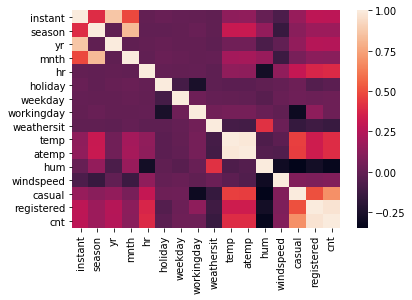

In [9]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [10]:
# checks correlation with all columns
print(corr['cnt'].sort_values(ascending=False)[:])

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df = df[['registered','cnt']]

In [13]:
# splitting data into train & test dataset
train,test=train_test_split(df,test_size=0.2)

In [14]:
print("train",train.shape)
print("test",test.shape)

train (13903, 2)
test (3476, 2)


In [15]:
# saving datasets into csv filesS
test.to_csv('test_data.csv',index=False,encoding='utf-8')
train.to_csv('train_data.csv',index=False,encoding='utf-8')


In [16]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

,registered,cnt
0,292,351
1,183,187
2,675,770
3,40,53
4,92,95


In [17]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.4)

In [18]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values


In [19]:
# saving cross validation data into csv file
cv_data.to_csv('cv_data.csv',index=False,encoding='utf-8')

In [20]:
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
y_pred = regressor.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,247,218.272727
1,32,32.478261
2,101,96.750000
3,58,64.050000
4,2,2.551724


In [22]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,registered,cnt
0,62,63
1,5,5
2,94,134
3,35,41
4,570,669


In [23]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

Accuracy of train data = 96.29778445582473
Accuracy of test data = 94.29460415709767


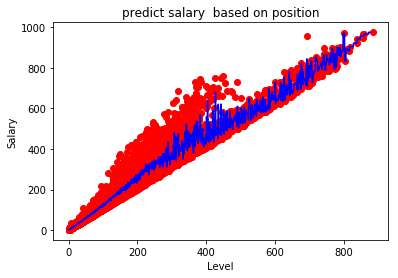

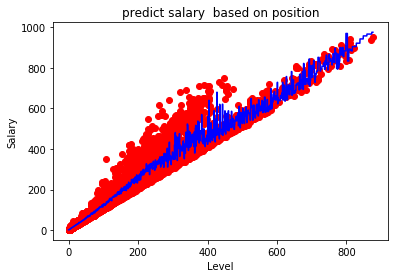

In [24]:
class DecisionTree:
    
    def get_predictions_train(self,x):        
        # getting prediction values
        y_pred = regressor.predict(x)
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize(self,y_pred,x,y):
        # visualizing the training set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x,y,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict salary  based on position')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        
        
def main():
    # creates class object 
    obj = DecisionTree()
    y_pred_train = obj.get_predictions_train(x_train)
    y_pred_test = obj.get_predictions_train(x_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    if acc_train >= 85 and acc_test >=  60:
        fileObject = open("train_data.pkl",'wb')
        pickle.dump(regressor,fileObject)   
        # here we close the fileObject
        fileObject.close()

    
    obj.visualize(y_pred_train,x_train,y_train)
    obj.visualize(y_pred_test,x_cv,y_cv)
    
    
    
if __name__ == '__main__':
    main()